In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans 

In [8]:
# extract data from "kmeans_data.xlsx"
data = pd.read_excel("kmeans_data.xlsx")
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.to_numpy()

# get state labels
states = data[1:, 0]

# get rows and columns corresponding to necessary data
data = data[1:, 1:]
kmeans_data = data[:, :]

# extract individual data
emissions_2018 = data[:,0].tolist()
change_in_emissions = data[:,1].tolist()
total_vehicles = data[:, 2].tolist()

In [9]:
# Conduct K-means
kmeans = KMeans(n_clusters=3,
                n_init=3,
                init='random',
                tol=1e-4, 
                random_state=170,
                verbose=False).fit(kmeans_data)

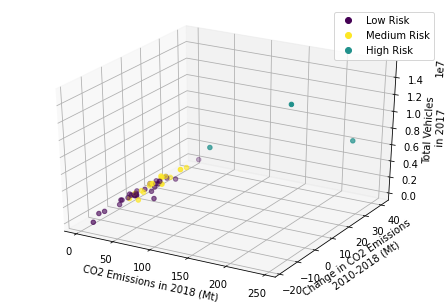

In [10]:
# plot 3D cluster results

fig = plt.figure()
ax = Axes3D(fig)
scatter = ax.scatter(emissions_2018, change_in_emissions, total_vehicles, c=kmeans.labels_)

ax.set_xlabel('CO2 Emissions in 2018 (Mt)')
ax.set_ylabel('Change in CO2 Emissions \n 2010-2018 (Mt)')
ax.set_zlabel('Total Vehicles \n in 2017')

handles, labels = scatter.legend_elements()
ax.legend([handles[0], handles[2], handles[1]], ['Low Risk', 'Medium Risk', 'High Risk'])

plt.show()


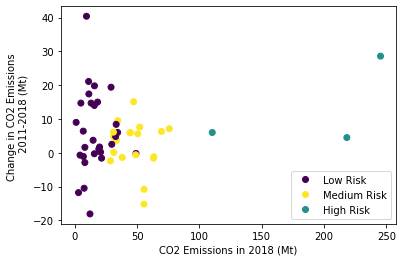

In [11]:
# plot 2D cluster results

fig, ax = plt.subplots()
scatter = ax.scatter(emissions_2018, change_in_emissions, c=kmeans.labels_)

ax.set_xlabel('CO2 Emissions in 2018 (Mt)')
ax.set_ylabel('Change in CO2 Emissions \n 2011-2018 (Mt)')

handles, labels = scatter.legend_elements()
ax.legend([handles[0], handles[2], handles[1]], ['Low Risk', 'Medium Risk', 'High Risk'])

plt.show()

In [12]:
# determine and print which states are low, medium, and high risks

low_risk = states[kmeans.labels_ == 0]
medium_risk = states[kmeans.labels_ == 2]
high_risk = states[kmeans.labels_ == 1]

print('Low risk states: \n', low_risk)
print('\n Medium risk states: \n', medium_risk)
print('\n High risk states: \n', high_risk)

Low risk states: 
 ['Alaska' 'Arkansas' 'Colorado' 'Connecticut' 'Delaware'
 'District of Columbia' 'Hawaii' 'Idaho' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Mississippi' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Mexico' 'North Dakota' 'Oklahoma' 'Oregon'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Utah' 'Vermont'
 'West Virginia' 'Wyoming']

 Medium risk states: 
 ['Alabama' 'Arizona' 'Georgia' 'Illinois' 'Indiana' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Missouri' 'New Jersey' 'New York'
 'North Carolina' 'Ohio' 'Pennsylvania' 'Tennessee' 'Virginia'
 'Washington' 'Wisconsin']

 High risk states: 
 ['California' 'Florida' 'Texas']
